In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [2]:
# Importing cleaned data from task 1
df = pd.read_csv("cleaned_data.csv", encoding='latin1')

In [3]:
df.head(2) # Showing top 2 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


So, I will try to calculate z-score for TotalPrice with:

1 - Loops

2 - vectorization

3 - Apply method

In [4]:
# Using For loop
mean = np.mean(df['TotalPrice'])  # for z-score calculation 
std_dev = np.std(df['TotalPrice']) # for z-score calculation 

for_sum = 0 # For time sum init to find average later
for i in range(5): # Finding the average time to beat processor state
    start = time() # Marking the start of the time
    for i in range(len(df)):
        # Z = (X - mean)/std
        df.loc[i,'Standarized TotalPrice'] = (df.loc[i,'TotalPrice'] - mean)/std_dev
    end = time() # Marking the end of the time
    for_time = end - start
    for_sum+= for_time
    print("Time elapsed", for_time,"Seconds")
for_average_time = for_sum/5
print("Average time =",for_average_time,"Seconds")


Time elapsed 46.65147686004639 Seconds
Time elapsed 47.015746116638184 Seconds
Time elapsed 47.13903307914734 Seconds
Time elapsed 46.397616147994995 Seconds
Time elapsed 46.67224359512329 Seconds
Average time = 46.77522315979004 Seconds


In [5]:
# Using Vectorization
vec_sum = 0 # Vectorization time sum init to find average later
for i in range(5): # Finding the average time to beat processor state
    start = time()
    df['Standarized TotalPrice'] = (df['TotalPrice'] - mean)/std_dev
    end = time()
    vectorization_time = end - start
    print("Time elapsed", vectorization_time,"Seconds")
    vec_sum += vectorization_time
vec_average_time = vec_sum/5
print("Average time =",vec_average_time,"Seconds")

Time elapsed 0.0035414695739746094 Seconds
Time elapsed 0.00312042236328125 Seconds
Time elapsed 0.002566814422607422 Seconds
Time elapsed 0.0020284652709960938 Seconds
Time elapsed 0.0020232200622558594 Seconds
Average time = 0.002656078338623047 Seconds


In [6]:
# Using Apply method

def standarize(num): # Creating function for Apply method to use
    return (num - mean)/std_dev

apply_sum = 0 # Apply method time sum init to find average later
for i in range(5):
    start = time()
    df['Standarized TotalPrice'] = df['TotalPrice'].apply(standarize)
    end = time()
    apply_time = end - start
    apply_sum+= apply_time
    print("Time elapsed", apply_time,"Seconds")
apply_average_time = apply_sum/5
print("Average time =",apply_average_time,"Seconds")

Time elapsed 0.1635739803314209 Seconds
Time elapsed 0.1312711238861084 Seconds
Time elapsed 0.1288306713104248 Seconds
Time elapsed 0.13824892044067383 Seconds
Time elapsed 0.11987829208374023 Seconds
Average time = 0.13636059761047364 Seconds


C:\Users\ahmad\AppData\Local\Temp\ipykernel_22900\3232390593.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Time', data=df, palette=['red', 'blue', 'green'], edgecolor='black')
C:\Users\ahmad\AppData\Local\Temp\ipykernel_22900\3232390593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Time', data=df, palette=['red', 'blue', 'green'], edgecolor='black')


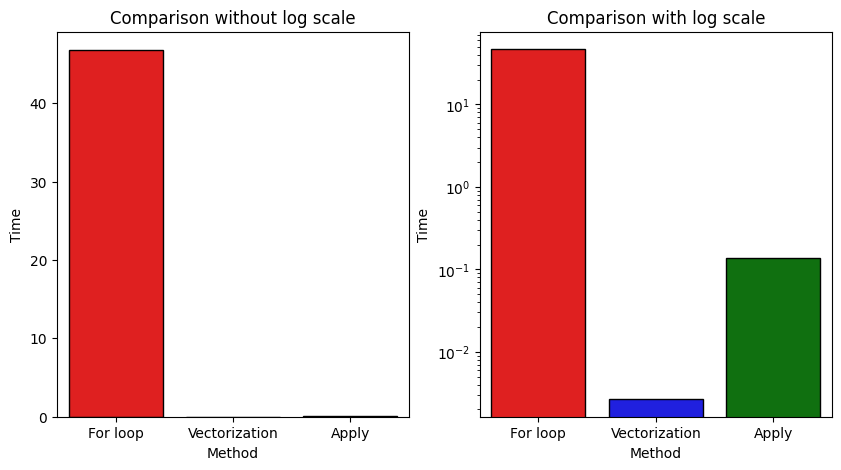

In [7]:
df = pd.DataFrame([["For loop",for_average_time],
                  ["Vectorization",vec_average_time],
                  ["Apply",apply_average_time]],
                  columns = ["Method","Time"])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.barplot(x='Method', y='Time', data=df, palette=['red', 'blue', 'green'], edgecolor='black')
plt.title("Comparison without log scale")
plt.subplot(1, 2, 2) 
sns.barplot(x='Method', y='Time', data=df, palette=['red', 'blue', 'green'], edgecolor='black')
plt.title("Comparison with log scale")
plt.yscale("log")